In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('kyphosis.csv')
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [ ]:
df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


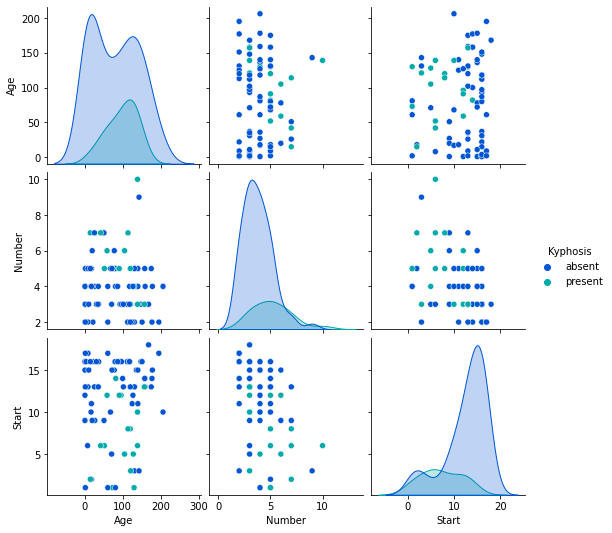

In [ ]:
#pair plot
sns.pairplot(df,hue='Kyphosis',palette='winter')

In [ ]:
#train an test
from sklearn.model_selection import train_test_split
x=df.drop('Kyphosis',axis=1)
y=df['Kyphosis']
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size=0.30)
#decision tree
from sklearn.tree import DecisionTreeClassifier
DT= DecisionTreeClassifier()

In [ ]:
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
#predicting the model
pred=DT.predict(x_test)

In [ ]:
#evaluating the model
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

      absent       0.81      0.72      0.76        18
     present       0.44      0.57      0.50         7

    accuracy                           0.68        25
   macro avg       0.63      0.65      0.63        25
weighted avg       0.71      0.68      0.69        25



In [ ]:
#confusion matrix
print(confusion_matrix(y_test,pred))

[[13  5]
 [ 3  4]]


In [ ]:
#visualizing the tree
from IPython.display import Image  
from io import StringIO  
from sklearn.tree import export_graphviz
import pydot 


In [ ]:
a= list(df.columns[1:])
a

['Age', 'Number', 'Start']

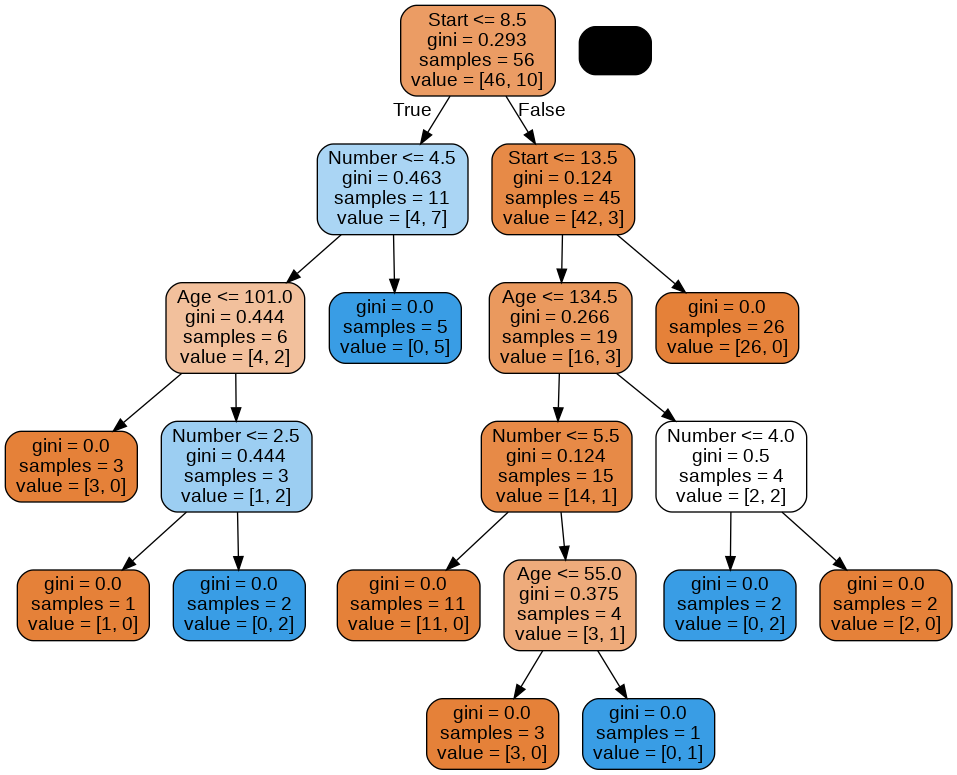

In [ ]:
dot_data= StringIO()  
export_graphviz(DT,out_file=dot_data,feature_names=a,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

In [ ]:
#random forests
from sklearn.ensemble import RandomForestClassifier
RF= RandomForestClassifier(n_estimators=100)
RF.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
RF_predict=RF.predict(x_test)

In [ ]:
print(confusion_matrix(y_test,RF_predict))

[[17  1]
 [ 5  2]]


In [ ]:
print(classification_report(y_test,RF_predict))

              precision    recall  f1-score   support

      absent       0.77      0.94      0.85        18
     present       0.67      0.29      0.40         7

    accuracy                           0.76        25
   macro avg       0.72      0.62      0.62        25
weighted avg       0.74      0.76      0.72        25

